In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

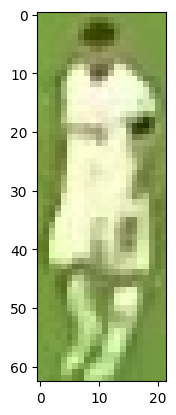

In [2]:
image_path = '/content/drive/MyDrive/Colab Notebooks/football_analytics/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

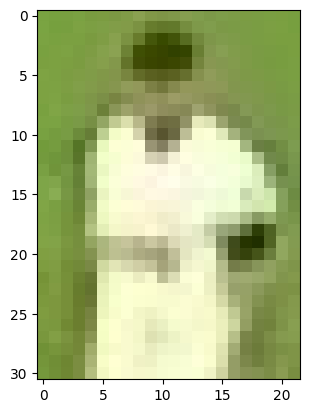

In [3]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

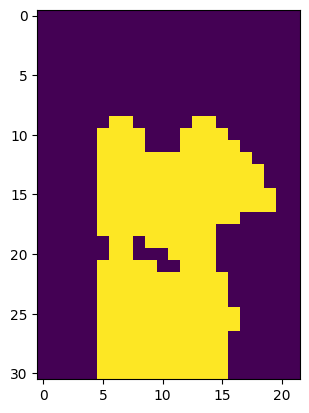

In [7]:
image_2d = top_half_image.reshape(-1, 3)
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

labels = kmeans.labels_
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])
plt.imshow(clustered_image)
plt.show()

In [8]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_clusters = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_clusters)

0


In [9]:
player_cluster = 1-non_player_clusters
print(player_cluster)

1


In [10]:
kmeans.cluster_centers_[player_cluster]

array([237.907173  , 241.76371308, 199.75105485])